# Ödev

Ödevde Naive Bayes algoritması kullanılarak 3 adet model geliştirilecektir. Ödevin amacı; Naive Bayes'in teorik alt yapısını anlamak ve bununla ilgili uygulama yapmaktır. Ödevin teorik kısmı GitHub readme.md içerisinde açıklanacaktır. IMRAD (Giriş (Özet), Metot, Sonuçlar ve Yorum) formatı kullanılabilir. Algoritmanın teorik yapısı ve kullanılan hiper parametrelerin çalışma prensibi anlatılmalıdır. Repository'nin Readme.md dosyası okunarak çalışma tekrarlanabilir olmalıdır.

## Veri Seti

In [42]:
import numpy as np
import pandas as pd

In [43]:
df = pd.read_csv("diabetes.csv")

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Veri setini pandas ve matplotlib kullanarak daha ayrıntılı analiz edebilir. Bunları yorumlayabiliriz. İsterseniz bu veri seti üzerinde de oynamalar yapabilirsiniz.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop(['Outcome'], axis = 1)
y = df["Outcome"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Model (Varsayılan Hiperparametreler İle Eğitim)

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [49]:
from sklearn.metrics import accuracy_score, classification_report

In [50]:
gnb = GaussianNB()

In [51]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [52]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

0.7662337662337663
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       151
           1       0.68      0.61      0.64        80

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



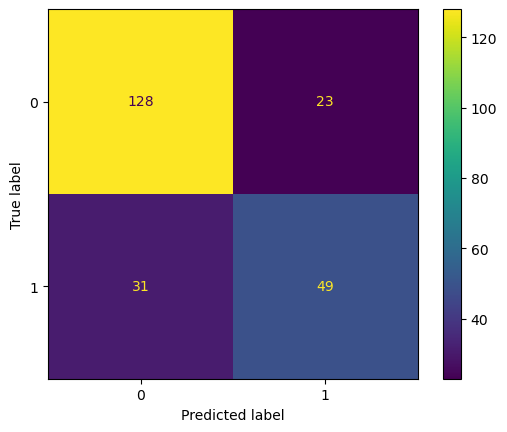

In [53]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
#plt.show()

## Model Tuning (GridSearch, RandomSearch, Bayesian Optimization)

Bu yöntemlerden birini(GridSearch ödev için yeterlidir.) ya da birden fazlasını kullanarak model tuning yapabilir, yeni hiperparametre seti ile model sonuçları bulabiliriz.

In [54]:
%%timeit
from sklearn.model_selection import RandomizedSearchCV
random_param_grid = {'var_smoothing': np.linspace(1e-3, 1e-20, 1000)}
random_search = RandomizedSearchCV(gnb, random_param_grid, scoring='accuracy', n_iter=1000, cv=10, n_jobs=-1)
random_search.fit(X_train, y_train)

3.05 s ± 64.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
print("Random Search - En iyi parametreler:", random_search.best_params_)
print("Random Search - En iyi skor:", random_search.best_score_)

Random Search - En iyi parametreler: {'var_smoothing': 2.00200200200216e-06}
Random Search - En iyi skor: 0.7502722323049003


0.7705627705627706
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       151
           1       0.69      0.61      0.65        80

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



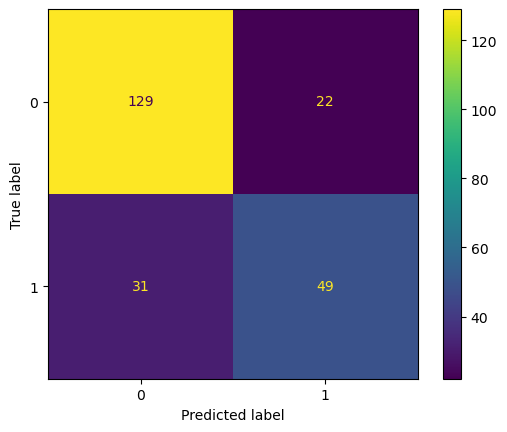

In [56]:
gnb = GaussianNB(var_smoothing=2e-6)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
#plt.show()

## Data Manipulation

Veri üzerinde değişiklik yaparak yeni veri seti elde edebilir ve modeli bu veri setinde eğitebiliriz. Örneğin; Normalizasyon (min-max, z-score), feature selection ya da feature engineering. Ödev için normalizasyon yeterlidir.

<Axes: >

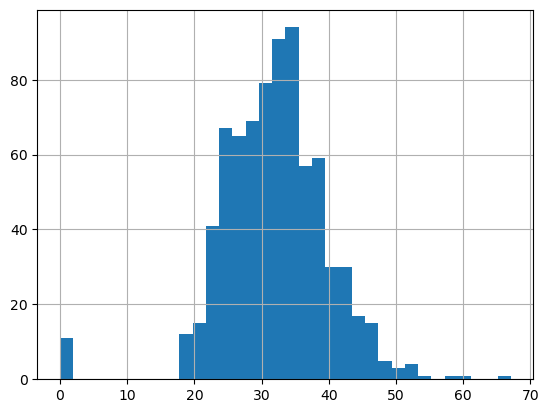

In [57]:
df['BMI'].hist(bins='auto')

0.8008658008658008
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       151
           1       0.72      0.69      0.71        80

    accuracy                           0.80       231
   macro avg       0.78      0.77      0.78       231
weighted avg       0.80      0.80      0.80       231



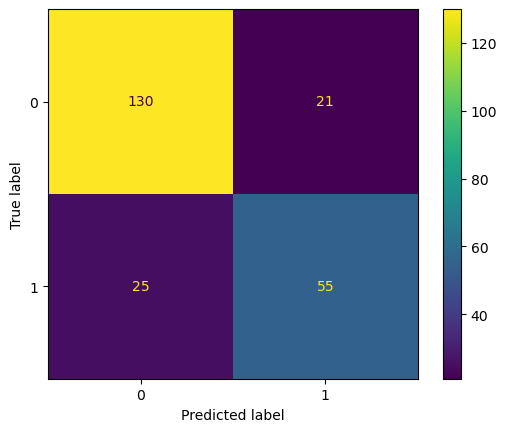

In [58]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X_train_normalized = pt.fit_transform(X_train)
X_test_normalized = pt.transform(X_test)

gnb.fit(X_train_normalized, y_train)
y_pred_normalized = gnb.predict(X_test_normalized)
print(accuracy_score(y_test, y_pred_normalized))
print(classification_report(y_test, y_pred_normalized))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_normalized)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
#plt.show()